In [1]:
!pip -q install transformers==4.25.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.8 MB/s eta 0:00:00


In [2]:
!pip -q install pytorch-lightning==1.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.5/701.5 KB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 34.3 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/clovaai/donut.git
!cd donut && pip -q install .

Cloning into 'donut'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 268 (delta 0), reused 3 (delta 0), pack-reused 264
Receiving objects: 100% (268/268), 62.76 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (123/123), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import re
from donut import DonutModel
import torch
import os
import json
from pathlib import Path
import shutil
from PIL import Image


In [5]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cp drive/MyDrive/benetech-making-graphs-accessible.zip .
!unzip -q benetech-making-graphs-accessible.zip

In [7]:
model = DonutModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
if torch.cuda.is_available():
    model.half()
    device = torch.device("cuda")
    model.to(device)
else:
    model.encoder.to(torch.bfloat16)
model.eval()
image = Image.open("train/images/0000ae6cbdb1.jpg").convert("RGB")
output = model.inference(image=image, prompt="<s_sroie-donut>")
output

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'predictions': [{'text_sequence': '<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'}]}

In [8]:
!rm -r dataset
!mkdir dataset

rm: cannot remove 'dataset': No such file or directory


In [9]:
import random, os, shutil
from tqdm import tqdm

img = 'images'
ant = 'annotations'

# Set the path to the directory containing the data
img_dir = f"train/{img}"
ant_dir = f"train/{ant}"

# Set the paths to the train, validation, and test directories
train_img_dir = f"dataset/train/{img}"
val_img_dir = f"dataset/validation/{img}"
test_img_dir = f"dataset/test/{img}"
train_ant_dir = f"dataset/train/{ant}"
val_ant_dir = f"dataset/validation/{ant}"
test_ant_dir = f"dataset/test/{ant}"



# Create the train, validation, and test directories if they don't already exist
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(test_img_dir, exist_ok=True)
os.makedirs(train_ant_dir, exist_ok=True)
os.makedirs(val_ant_dir, exist_ok=True)
os.makedirs(test_ant_dir, exist_ok=True)

# Set the ratio of data to use for train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Get a list of all the files in the data directory
all_files = os.listdir(ant_dir)

# Shuffle the list of files randomly
random.shuffle(all_files)

# Calculate the number of files to use for train, validation, and test sets
num_train = int(len(all_files) * train_ratio)
num_val = int(len(all_files) * val_ratio)
num_test = len(all_files) - num_train - num_val

# Iterate over the shuffled list of files and move them to the appropriate directory
for i, filename in tqdm(enumerate(all_files)):
    if filename.endswith('.json'):
        if i < num_train:
            shutil.copy(os.path.join(img_dir, filename[:-5]+'.jpg'), os.path.join(train_img_dir, filename[:-5]+'.jpg'))
            shutil.copy(os.path.join(ant_dir, filename), os.path.join(train_ant_dir, filename))
        elif i < num_train + num_val:
            shutil.copy(os.path.join(img_dir, filename[:-5]+'.jpg'), os.path.join(val_img_dir, filename[:-5]+'.jpg'))
            shutil.copy(os.path.join(ant_dir, filename), os.path.join(val_ant_dir, filename))
        else:
            shutil.copy(os.path.join(img_dir, filename[:-5]+'.jpg'), os.path.join(test_img_dir, filename[:-5]+'.jpg'))
            shutil.copy(os.path.join(ant_dir, filename), os.path.join(test_ant_dir, filename))
    else:
        print('different file found')


60578it [00:11, 5105.94it/s]


In [10]:
for dir in ['train','test','validation']:
    # define paths
    base_path = Path(f"dataset/{dir}")
    metadata_path = base_path.joinpath("annotations")
    image_path = base_path.joinpath("images")

    # define metadata list
    metadata_list = []

    # parse metadata
    for file_name in metadata_path.glob("*.json"):
        with open(file_name, "r") as json_file:

            # load json file
            data = json.load(json_file)
            # create "text" column with json string
            proc = {}
            for key,value in data.items():
                if key in ['chart-type']:
                    proc[key] = value
                elif key in ['data-series']: 
                    i = 0 
                    for coord in data['data-series']:             
                        for key1,value1 in coord.items():
                            if isinstance(value1, float):
                                # Round the float value to 4 decimal places
                                value1 = round(value1, 4)
                            proc[f"{key1}_{i}"] = str(value1)
                        i+=1
                            

            text = json.dumps(proc)
            # add to metadata list if image exists
            if image_path.joinpath(f"{file_name.stem}.jpg").is_file():
              metadata_list.append({"ground_truth":"{\"gt_parse\": "+f"{text}"+"}","file_name":f"{file_name.stem}.jpg"})
              # delete json file


    # write jsonline file
    with open(image_path.joinpath('metadata.jsonl'), 'w') as outfile:
        for entry in metadata_list:
            json.dump(entry, outfile)
            outfile.write('\n')

In [11]:
for dir in ['train','test','validation']:
    # Set the path to the directory to move
    dir_to_move = f"dataset/{dir}/images"

    # Set the path to the parent directory
    parent_dir = f"dataset/{dir}"


    # Move the contents of the directory to the parent directory
    for filename in os.listdir(dir_to_move):
        src = os.path.join(dir_to_move, filename)
        dst = os.path.join(parent_dir, filename)
        shutil.move(src, dst)

    # Remove the original directory
    shutil.rmtree(dir_to_move)
    shutil.rmtree(f"dataset/{dir}/annotations")

In [12]:
('metadata.jsonl' in os.listdir('dataset/validation')) and ('metadata.jsonl' in os.listdir('dataset/train')) and ('metadata.jsonl' in os.listdir('dataset/test'))

True

In [15]:
!cd donut && python train.py --config config/train_cord.yaml

Streaming output truncated to the last 5000 lines.
Epoch 2:  97% 17620/18173 [3:02:50<05:44,  1.61it/s, loss=1.31, v_num=4628]
                                                                           
Prediction: <s_chart-type>line</s_chart-type><s_x_0>Burundi</s_x_0><s_y_0>80.6269</s_y_0><s_x_1>Cambodia</s_x_1><s_y_1>86.9587</s_y_1><s_x_2>Cameroon</s_x_2><s_y_2>86.9587</s_y_2><s_x_3>Canada</s_x_3><s_y_3>101.7279</s_y_3><s_x_4>Cape Verde</s_x_4><s_y_4>81.6269</s_y_4><s_x_5>Caribbean</s_x_5><s_y_5>105.1164</s_y_5><s_x_6>Central African...</s_x_6><s_y_6>90.1164</s_y_6><s_x_7>Central America</s_x_7><s_y_7>91.0967</s_y_7><s_x_8>Central Asia</s_x_8><s_y_8>71.9587</s_y_8><s_x_9>Chad</s_x_9><s_y_9>81.6269</s_y_9>
Epoch 2:  97% 17620/18173 [3:02:51<05:44,  1.61it/s, loss=1.31, v_num=4628]
                                                                           
    Answer: <s_chart-type>line</s_chart-type><s_x_0>Burundi</s_x_0><s_y_0>81.2217</s_y_0><s_x_1>Cambodia</s_x_1><s_y_1>88.6897</s_

In [19]:
from donut import DonutModel
from PIL import Image
import torch
model = DonutModel.from_pretrained("./donut/result/train_cord/20230331_204628")
if torch.cuda.is_available():
    model.half()
    device = torch.device("cuda")
    model.to(device)
else:
    model.encoder.to(torch.bfloat16)




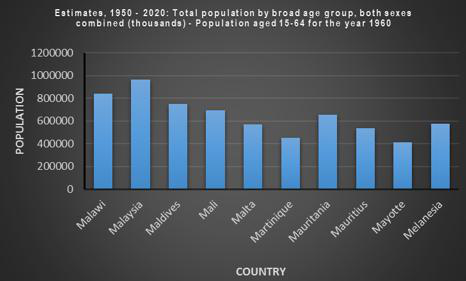

In [28]:
Image.open("train/images/0000ae6cbdb1.jpg")

In [27]:
image = Image.open("train/images/0000ae6cbdb1.jpg").convert("RGB")
output = model.inference(image=image, prompt="<s_x_0>")
output

{'predictions': [{'x_1': 'Malaysia',
   'y_1': '96314',
   'x_2': 'Maldives',
   'y_2': '77777.7777',
   'x_3': 'Mali',
   'y_3': '66493',
   'x_4': 'Malta',
   'y_4': '547295.4785',
   'x_5': 'Martinique',
   'y_5': '495998.6',
   'x_6': 'Mauritania',
   'y_6': '66493',
   'x_7': 'Mauritius',
   'y_7': '595998.6',
   'x_8': 'Mayotte',
   'y_8': '395998.6',
   'x_9': 'Melanesia',
   'y_9': '595998.6'}]}